<a href="https://colab.research.google.com/github/irfansalini/DLCV_Workshop/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
import cv2
from matplotlib import pyplot as plt
import math

def take_photo(filename='happy.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to happy.jpg


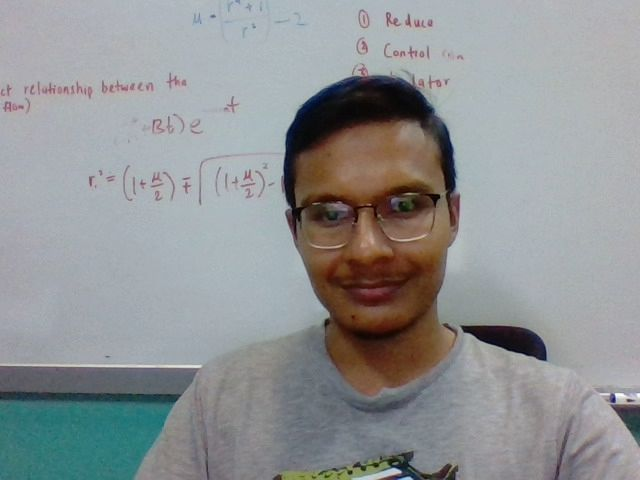

In [44]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

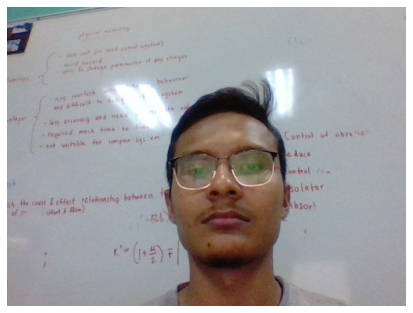

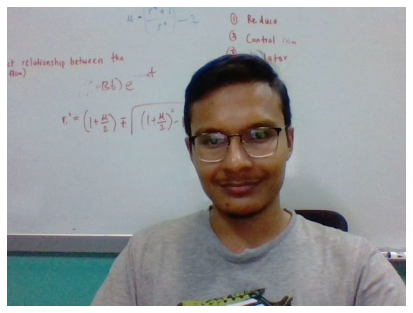

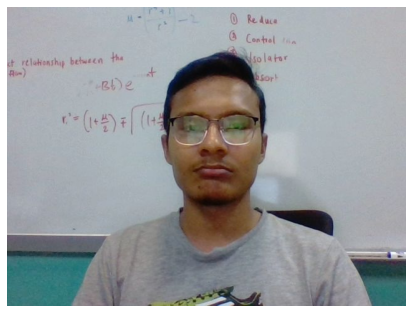

In [51]:
import cv2 
from google.colab.patches import cv2_imshow
def displayImage(image):
    if len(image.shape)==3:
        color_coverted = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(color_coverted)
        plt.axis('off')
        plt.grid(False)
        plt.show()
        
    else:
        plt.imshow(image, cmap="gray")
        plt.axis('off')
        plt.grid(False)
        plt.show()

#open image
image1 = cv2.imread('neutral.jpg')
image2 = cv2.imread('happy.jpg')
image3 = cv2.imread('sad.jpg') 

displayImage(image1)
displayImage(image2)
displayImage(image3)



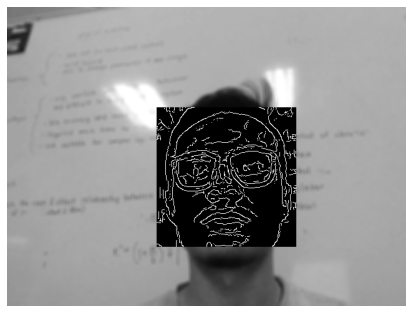

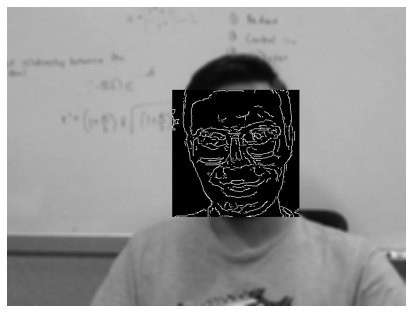

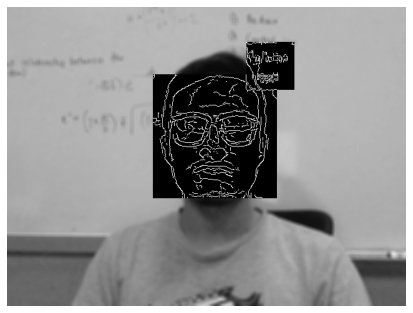

In [52]:
#convert images to RGB
image1 = cv2.cvtColor(image1,cv2.COLOR_BGR2RGB)
image2 = cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)
image3 = cv2.cvtColor(image3,cv2.COLOR_BGR2RGB)

#image for blur
image1_blur = np.copy(image1)
image2_blur = np.copy(image2)
image3_blur = np.copy(image3)

#image for edge detection
image1_edge = np.copy(image1)
image2_edge = np.copy(image2)
image3_edge = np.copy(image3)

kernel = np.ones((3,3), np.float32)/9 # box filter

image1_gray = cv2.cvtColor(image1,cv2.COLOR_RGB2GRAY)
image2_gray = cv2.cvtColor(image2,cv2.COLOR_RGB2GRAY)
image3_gray = cv2.cvtColor(image3,cv2.COLOR_RGB2GRAY)

image1_blur = cv2.GaussianBlur(image1_gray,(7,7),10)
image2_blur = cv2.GaussianBlur(image2_gray,(7,7),10)
image3_blur = cv2.GaussianBlur(image3_gray,(7,7),10)

# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

faces1 = face_cascade.detectMultiScale(image1)
faces2 = face_cascade.detectMultiScale(image2)
faces3 = face_cascade.detectMultiScale(image3)

for (x, y, w, h) in faces1:
  image1_blur[y:y+h,x:x+w] = cv2.Canny(image1_blur[y:y+h,x:x+w],1,30)
  
displayImage(image1_blur)

for (x, y, w, h) in faces2:
  image2_blur[y:y+h,x:x+w] = cv2.Canny(image2_blur[y:y+h,x:x+w],1,30)

displayImage(image2_blur)


for (x, y, w, h) in faces3:
  image3_blur[y:y+h,x:x+w] = cv2.Canny(image3_blur[y:y+h,x:x+w],1,30)

displayImage(image3_blur)




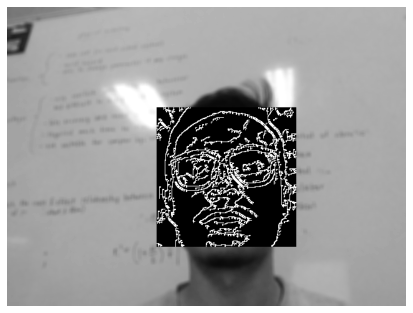

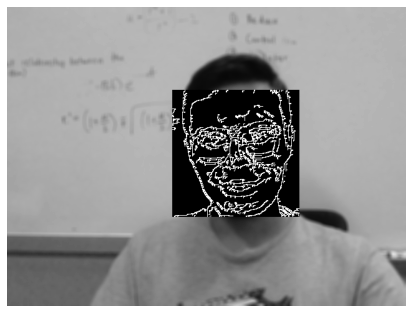

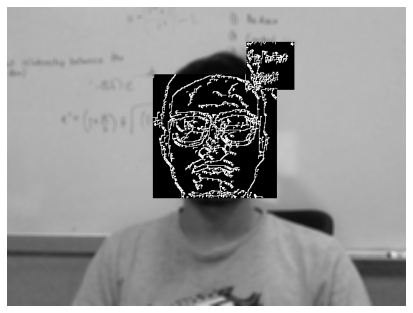

In [53]:
for (x, y, w, h) in faces1:
  image1sobelx = cv2.Sobel(image1_blur[y:y+h,x:x+w], cv2.CV_8U,1,0,ksize=3)
  image1sobely = cv2.Sobel(image1_blur[y:y+h,x:x+w], cv2.CV_8U,0,1,ksize=3)
  image1_blur[y:y+h,x:x+w] = image1sobelx + image1sobely  

displayImage(image1_blur)

for (x, y, w, h) in faces2:
  image2sobelx = cv2.Sobel(image2_blur[y:y+h,x:x+w], cv2.CV_8U,1,0,ksize=3)
  image2sobely = cv2.Sobel(image2_blur[y:y+h,x:x+w], cv2.CV_8U,0,1,ksize=3)
  image2_blur[y:y+h,x:x+w] = image2sobelx + image2sobely  

displayImage(image2_blur)

for (x, y, w, h) in faces3:
  image3sobelx = cv2.Sobel(image3_blur[y:y+h,x:x+w], cv2.CV_8U,1,0,ksize=3)
  image3sobely = cv2.Sobel(image3_blur[y:y+h,x:x+w], cv2.CV_8U,0,1,ksize=3)
  image3_blur[y:y+h,x:x+w] = image3sobelx + image3sobely  

displayImage(image3_blur)


(480, 640)


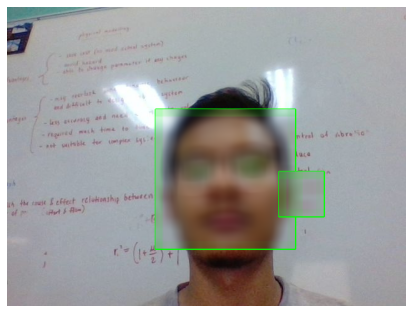

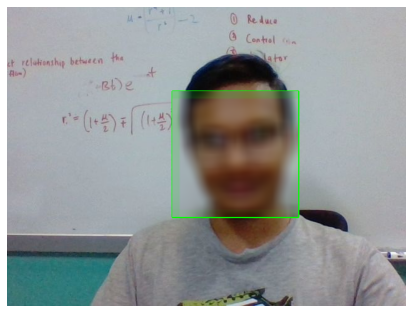

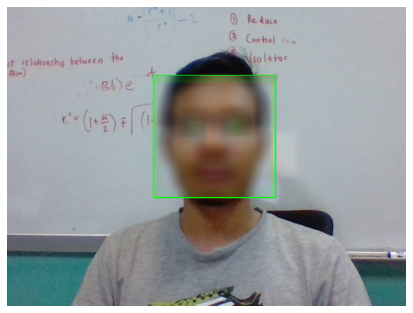

In [56]:
# A function for plotting the images
def plotImages(img):
	plt.imshow(img, cmap="gray")
	plt.axis('off')
	plt.style.use('seaborn')
	plt.show()


# Reading an image using OpenCV
# OpenCV reads images by default in BGR format
image1 = cv2.imread('neutral.jpg')
image2 = cv2.imread('happy.jpg')
image3 = cv2.imread('sad.jpg')


# Converting BGR image into a RGB image
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
image3 = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)

#plotting the original image
#plotImages(image)

face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

#face_data = face_detect.detectMultiScale(image)
gray1 = cv2.cvtColor(image1, cv2.COLOR_RGB2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_RGB2GRAY)
gray3 = cv2.cvtColor(image3, cv2.COLOR_RGB2GRAY)


print(gray1.shape)
# get face bounding box coordinates using Haar Cascade
faces1 = face_cascade.detectMultiScale(gray1)
faces2 = face_cascade.detectMultiScale(gray2)
faces3 = face_cascade.detectMultiScale(gray3)

# Draw rectangle around the faces which is our region of interest (ROI)
for (x, y, w, h) in faces1:
	cv2.rectangle(image1, (x, y), (x + w, y + h), (0, 255, 0), 2)
	roi = image1[y:y+h, x:x+w]
	# applying a gaussian blur over this new rectangle area
	roi = cv2.GaussianBlur(roi, (23, 23), 30)
	# impose this blurred image on original image to get final image
	image1[y:y+roi.shape[0], x:x+roi.shape[1]] = roi

for (x, y, w, h) in faces2:
	cv2.rectangle(image2, (x, y), (x + w, y + h), (0, 255, 0), 2)
	roi = image2[y:y+h, x:x+w]
	# applying a gaussian blur over this new rectangle area
	roi = cv2.GaussianBlur(roi, (23, 23), 30)
	# impose this blurred image on original image to get final image
	image2[y:y+roi.shape[0], x:x+roi.shape[1]] = roi

for (x, y, w, h) in faces3:
	cv2.rectangle(image3, (x, y), (x + w, y + h), (0, 255, 0), 2)
	roi = image3[y:y+h, x:x+w]
	# applying a gaussian blur over this new rectangle area
	roi = cv2.GaussianBlur(roi, (23, 23), 30)
	# impose this blurred image on original image to get final image
	image3[y:y+roi.shape[0], x:x+roi.shape[1]] = roi

# Display the output
plotImages(image1)
plotImages(image2)
plotImages(image3)


Coins in the image:  4


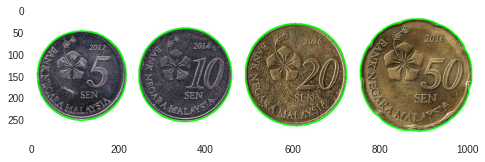

In [55]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('rm_coins.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray');

blur = cv2.GaussianBlur(gray, (11,11), 0)
plt.imshow(blur, cmap='gray')

canny = cv2.Canny(blur, 30, 150, 3)
plt.imshow(canny, cmap='gray')

dilated = cv2.dilate(canny, (1,1), iterations = 2)
plt.imshow(dilated, cmap='gray')

(cnt, heirarchy) = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt, -1, (0,255,0), 2)

plt.imshow(rgb)

print('Coins in the image: ', len(cnt))
plt.grid(False)
plt.show()